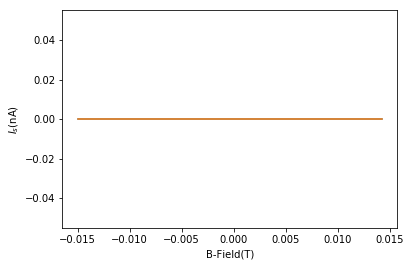

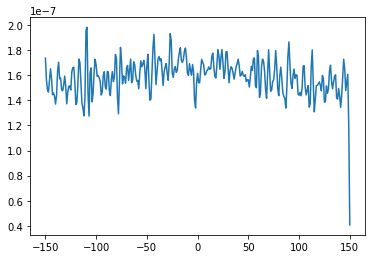

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
import scipy.signal

DataArr = namedtuple('DataArr', 'bias voltage1 voltage2')

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def calc_Is(bias,voltage, cutoff):
    index = 0
    gradHeight = 0
    #gradient = np.absolute(np.gradient(voltage))
    gradient = scipy.signal.savgol_filter(np.absolute(np.gradient(voltage)),5,2)
    for i in range(0, len(gradient)):
        if gradient[i] > gradHeight:
            index = i
            gradHeight = gradient[i]
    if gradient[index] > cutoff:
        return np.absolute(bias[index]), gradient
    else:
        return 0, gradient

def loadData(filename):
    with open(filename) as f:
        lines = f.readlines()

        bias = []
        voltage1 = []
        voltage2 = []
        dataDict = {}

        for line in lines[52:-1]:
            #print(str(line[0:5]))
            data = line.split()
            if len(data) > 0:
                B = data[1]
                bias.append(float(data[0]))
                voltage1.append(float(data[3]))
                voltage2.append(float(data[4]))
            elif not type(B) == bool:
                dataDict[B] = DataArr(bias,voltage1, voltage2)
                bias = []
                voltage1 = []
                voltage2 = []
                B = False
    return dataDict

def main():
    cutoff = 0.00121
    filename = 'D:\eleerssen\Data\JJ_gates\InAs_epiAl_JJ_gates_WL_3_05_4.dat'
    #filename = 'D:\eleerssen\Data\JJ_test_1\InAs_epiAl_JJ_test_1_1WxL_3_1_2WxL_05_03_1.dat'
    #filename = 'D:\eleerssen\Data\JJ_test_1\InAs_epiAl_JJ_test_1_1WxL_5_1_2WxL_1_03_2.dat'
    data = loadData(filename)
    fields = []
    currents1 = []
    currents2 = []
    gradDict1 = {}
    gradDict2 = {}
    for key in data.keys():
        switchCur1, gradient1 = calc_Is(data[key].bias, data[key].voltage1, cutoff)
        switchCur2, gradient2 = calc_Is(data[key].bias, data[key].voltage2, cutoff)
        fields.append(float(key))
        currents1.append(switchCur1)
        currents2.append(switchCur2)
        gradDict1[key] = gradient1
        gradDict2[key] = gradient2

    keys = list(data.keys())

    plt.plot(fields, currents1)
    plt.plot(fields, currents2)
    plt.xlabel("B-Field(T)")
    plt.ylabel("$I_s$(nA)")
    plt.show()
    #print(len(keys))
    #plt.plot(data[keys[0]].bias, smooth(gradDict1[keys[50]], 15))
    plt.plot(data[keys[0]].bias, gradDict1[keys[10]])
    #plt.plot(data.bias, data.voltage2)
    plt.show()


main()



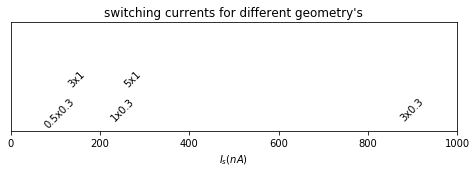

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,2))
plt.title("switching currents for different geometry's")
plt.xlabel('$I_s(nA)$')
plt.xlim(left=0,right=1000)
plt.yticks([])
plt.text(250,0.5,'5x1',rotation=45)
plt.text(125,0.5,'3x1',rotation=45)
plt.text(870,0.25,'3x0.3',rotation=45)
plt.text(220,0.25,'1x0.3',rotation=45)
plt.text(72,0.25,'0.5x0.3',rotation=45)
plt.show()